Describe a QPE procedure to find $ \theta $ when $ U |\psi\rangle = e^{2\pi i \theta} |\psi \rangle $


In [7]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from IPython.display import display, Latex
from math import pi
import math
from qiskit.circuit.library import QFT, CUGate
from qiskit.circuit.library import UGate

import numpy as np

Lets take the example of U as pauli X opearator, if we produce hadamard gate as initial state, it would give its eigenvector. 

In [8]:
def IQFT(no_of_Qubits):
    qc = QuantumCircuit(no_of_Qubits, name="myIQFT")
        
    for q in range(no_of_Qubits-1, -1, -1):
        for i in range(no_of_Qubits-1, q, -1):
            qc.cp(-pi/(2**(i-q)), i, q)
        qc.h(q)
        
    qc.to_gate()
    return qc
        

In [9]:
Precision = 3

QREG = QuantumRegister(Precision+1)
CREG = ClassicalRegister(Precision)

QC = QuantumCircuit(QREG, CREG)
QC.h(Precision)
QC.barrier()

for i in range(Precision):
    QC.h(i)

from qiskit.circuit.library.standard_gates import TGate
U = TGate.control(1)

for i in range(Precision):
    for t in range(2**(i)):
        QC.append(U, [Precision-i-1, Precision])

myIQfT = IQFT(Precision)
QC.append(QFT(Precision, 0, inverse=True, do_swaps=False), range(Precision) )
state = Statevector(QC)
state.draw(output="latex")


TypeError: t() takes 2 positional arguments but 3 were given

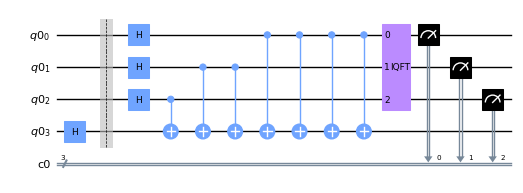

In [ ]:
QC.measure(range(Precision),range(Precision))
QC.draw(scale=0.5, output="mpl", fold=1000)

In [ ]:
def convertBinaryToDecimal(str):
    str = list(str)
    o = 0 
    multiplication_factor = 2
    while str:
        if int(str.pop(0)): 
            o += 1/multiplication_factor
        multiplication_factor *= 2
    return o


In [ ]:
from qiskit.primitives import Sampler
sampler = Sampler()
job = sampler.run(QC)

for key, value in job.result().quasi_dists[0].items():
    val = convertBinaryToDecimal(bin(key)[2:])
    print(key, "prob = ", round(value, 3), " Eigen value = ", np.round(np.cos(2*np.pi*val)+1j*np.sin(2*np.pi*val), 2))

0 prob =  1.0  Eigen value =  (1+0j)
